# Lista 2 - Algoritmos Genéticos

#### 1. Defina o conceito de algoritmo genético, apresentando suas vantagens e desvantagens

Algoritmos Genéticos (AGs) são algoritmos inspirados na Teoria da Evolução de Darwin. Ela é fundamentada que o crescimento das espécies é maior do que de recursos para sobreviver, por isso para que uma espécie consiga sobreviver é necessário que fiquem apenas os mais aptos àquele ambiente. Nesse sentido, os AGs são algoritmos que irão gerar várias soluções e com o passar do tempo sobrarão apenas as melhores.

#### 2. Discorra sobre os conceitos a seguir:

1. diversificação e intensificação;

Diversificação e Intensificação são fatores importantes na Teoria da Evolução e nos AGs. No primeiro a diversificação de indivíduos é importante tanto para encontrar diferentes habilidades para sobreviver ao ambiente e possivelmente encontrar a melhor, além de que se os indivíduos forem muito parecidos seria muito fácil combater a espécie. Já no quesito de intensificação, quando achamos a melhor habilidade para sobrevivência, então é necessário que o portador se reproduza mais e mais para compartilhar com a espécie. 

No segundo caso diversificação significa que vamos procurar em diferentes lugares do nosso espaço de busca do algoritmo para procurarmos o mínimo (máximo) global e a intensificação significa que ao encontrar regiões promissores, procuramos com mais afinco nessa região.

2. paralelismo explícito e paralelismo implícito;

O paralelismo explícito refere-se ao fato de conseguirmos vasculhar vários conjuntos de soluções no espaço de busca procurando a melhor. O paralelismo implícito refere-se ao fato de conseguirmos encontrar blocos de soluções ótimas.

3. cromossomo, gene, alelo, lócus, genótipo, fenótipo e epístase;

Cromossomo: é a unidade básica de hereditariedade que carrega informações genéticas. No contexto dos algoritmos genéticos, um cromossomo é uma sequência de genes que representa uma solução candidata para o problema em questão.

Gene: é uma sequência de DNA que contém as informações genéticas para uma característica específica. No contexto dos algoritmos genéticos, um gene é uma parte do cromossomo que codifica uma característica da solução, como o valor ou o peso de um item na mochila.

Alelo: é uma variante de um gene que pode ocorrer em um mesmo lócus. Por exemplo, um alelo para o gene que codifica a cor dos olhos pode ser azul ou castanho.

Lócus: é o local físico no cromossomo onde um gene está localizado. Por exemplo, o lócus que codifica a cor dos olhos pode estar localizado no braço longo do cromossomo 15.

Genótipo: é o conjunto completo de genes e alelos que uma solução candidata contém. No contexto dos algoritmos genéticos, o genótipo representa a informação genética completa de um indivíduo na população.

Fenótipo: é a expressão física ou observável de um genótipo. No contexto dos algoritmos genéticos, o fenótipo representa a solução candidata correspondente ao genótipo.

Epístase: é uma interação entre genes que afeta a expressão fenotípica. No contexto dos algoritmos genéticos, a epístase pode afetar a eficácia das operações de cruzamento e mutação, uma vez que a mudança em um gene pode afetar a expressão de outros genes. Por exemplo, se o gene que codifica o peso de um item na mochila estiver epistaticamente ligado ao gene que codifica o valor do item, uma mudança no peso pode afetar a utilidade geral da solução.

4. codificação;

A codificação é a transcrição do problema para o algoritmo, é a forma como você vai representar seu problema no algoritmo e quais serão os operadores a serem utilizados.

5. elitismo;

O elitismo refere-se ao fato de que manteremos as melhores soluções geradas com o passar do AG.

6. estratégias geracional e incremental

As estratégias geracionais e incrementais são dois modelos de atualização de população em algoritmos genéticos. Na estratégia geracional, uma população é gerada em cada geração, substituindo completamente a população anterior. Na etapa de reprodução, os indivíduos são selecionados com base em seu desempenho na função objetivo e são cruzados para gerar uma nova geração de indivíduos A estratégia incremental, por outro lado, a população é atualizada gradualmente, mantendo alguns dos indivíduos da geração anterior e adicionando novos indivíduos gerados a partir dos pais selecionados na etapa de reprodução.



In [1]:
%load_ext autoreload
%autoreload 2

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random
from AG import *

In [2]:
def funcao1(x):
    return 2*x*x +5*x

In [3]:
def torneio(valor,i,check = 'max'):
    if(check == 'max'):
        return i  if(valor[i]>valor[i+1]) else i+1
    if(check == 'min'):
        return i  if(valor[i]<valor[i+1]) else i+1

In [25]:
def Att(vencedores,funcao):
    p  = 1 - funcao(vencedores)/np.sum(funcao(vencedores))
    # Geramos os decendentes e esses decendentes serão a nova população
    bin_vencedores = np.array([bin(int(i)) for i in vencedores])
    
    np.random.shuffle(bin_vencedores)
    descentende = bin_vencedores[:2]
    max = np.max(np.array([len(i) for i in descentende]))
    filho = ''        
    for i in range(2):
        while(len(descentende[i]) != max):
            descentende[i] = '0'+descentende[i]
    for i,j in zip(descentende[0],descentende[1]):
        filho += i if(p[0] < np.random.rand()) else j
    
    t = 0
    for i in filho:
        if(i == '0'):
            t += 1
        else: 
            break
    if(t != 0):
        filho = int(filho[:t],2)
    else:
        return 0
    return filho


In [52]:
def AG_real(samples,funcao,check = 'min'):

    # Geração de uma população aleatória
    população = np.random.uniform(-100,100,size = samples) 
    PLOT = []
    for k in range(1000):

        #Valor da capacidade é definido pela funcao e pela população
        capacidade = funcao(população)
        PLOT.append([np.mean(capacidade),k])
        #Aleatorizamos as capacidades
        rang = np.arange(len(capacidade))
        np.random.shuffle(rang)
        capacidade = capacidade[rang]
        população = população[rang]

        #Fazemos o torneio para saber quem é o maior(menor) em pares
        resultado = [torneio(capacidade,i,check) for i in range(0,len(capacidade),2)]
        #Aqui geramos os Vencedores ou Progenitores
        vencedores = população[resultado]
        filho = Att(vencedores,funcao)

        população[np.argsort(funcao(população))[-1]] = filho
    return população[np.argsort(funcao1(população))][0],np.array(PLOT).T

In [53]:
valor,plot = AG_real(500,funcao1,'min')

In [59]:
valor,funcao1(valor)

(-1.2132592878659807, -3.1223002401437703)

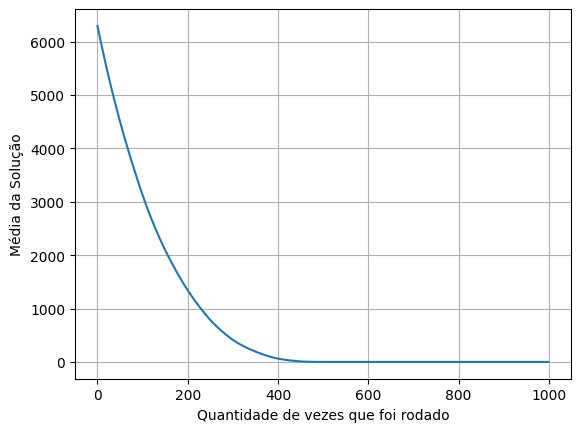

In [58]:
plt.plot(plot[1],plot[0])
plt.grid()
plt.ylabel("Média da Solução")
plt.xlabel("Quantidade de vezes que foi rodado")
plt.show()

https://www.kaggle.com/datasets/binhthanhdang/dkpdataset?select=idkp1.txt

In [182]:
teste = np.loadtxt('./archive/idkp1.txt',dtype=str)
teste = [i.split(',') if(',' in i) else int(i) for i in teste]
Mochila = teste[0]
Peso = np.array(teste[1], dtype=int)
Valor = np.array(teste[2], dtype=int)

In [3]:
Mochila = 35
Peso = np.array([10,18,12,14,13,11,8,6])
Valor = np.array([5,8,7,6,9,5,4,3])

In [28]:
def AG_KPS(Valor,Peso,Mochila,tipo_geração,tipo_descendente,tipo_att):
    Q = []
    Tempo = []
    população = generate_população(Valor,Peso,Mochila,tipo_geração)
    for t in range(1000):
        Qualidade,Peso_Total = KPS(população,Valor,Peso)
        Q.append([np.mean(Qualidade),np.max(Qualidade)])
        Tempo.append(t)
        if(np.mean(Qualidade) == np.max(Qualidade)):
            return população[0],np.array(Q),np.array(Tempo)
        if(tipo_geração == 'aleatorio'):
            Penalidade = np.max(Valor/Peso)
            Qualidade[Peso_Total > Mochila] = Qualidade[Peso_Total > Mochila] - Penalidade*(Peso_Total[Peso_Total > Mochila] - Mochila)
        
        rang = np.arange(len(Qualidade))
        np.random.shuffle(rang)
        Qualidade = Qualidade[rang]
        população = população[rang]

        resultado = [torneio(Qualidade,i,'max') for i in range(0,len(Qualidade),2)]
        vencedores = população[resultado]
        
        descendentes = Cruzamento(vencedores,Valor,Peso, Mochila,tipo_descendente)
        população = Atualização(população,descendentes,Valor,Peso,Mochila,tipo_att)
        
    Qualidade,Peso_Total = KPS(população,Valor,Peso)

    return população[np.max(Qualidade) == Qualidade][0],np.array(Q),np.array(Tempo)

[1 0 1 0 1 0 0 0]


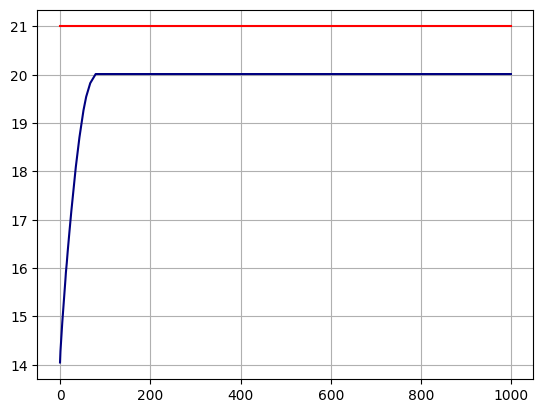

In [30]:
Solução,Q,Tempo = AG_KPS(Valor,Peso,Mochila,'baseado','probabilistico','incremental')
print(Solução)
plt.plot(Tempo,Q.T[0],c = 'navy',label = 'Média das Aptidões das Soluções')
plt.plot(Tempo,Q.T[1],c = 'red',label = 'Maior Aptidão das Soluções')
plt.grid()
plt.show()

In [193]:
KPS(Solução,Valor,Peso)

(75079, 61479)

In [194]:
KPSresposta(Valor, Peso, Mochila)

Objetivo:  78608.77273612842
Itens na mochila:  [1, 4, 6, 7, 9, 10, 11, 16, 19, 20, 22, 23, 25, 31, 32, 34, 37, 38, 43, 46, 47, 49, 51, 52, 53, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 70, 73, 76, 77, 82, 85, 88, 89, 91, 93, 94, 95, 97, 98, 99, 100, 101, 103, 106, 107, 109, 110, 115, 116, 118, 119, 121, 124, 127, 128, 130, 131, 133, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 153, 154, 160, 161, 163, 166, 167, 168, 169, 170, 171, 172, 175, 178, 181, 182, 184, 185, 186, 187, 188, 193, 199, 200, 205, 208, 211, 214, 215, 217, 220, 221, 222, 223, 226, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 241, 244, 247, 248, 250, 253, 256, 257, 259, 262, 265, 266, 271, 274, 275, 277, 280, 281, 282, 283, 284, 286, 287, 288, 292, 293, 295, 296, 297, 298, 299]


In [190]:
Solução

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [155]:
Q

array([[14.578125, 20.      ],
       [14.765625, 20.      ],
       [14.921875, 20.      ],
       [15.09375 , 20.      ],
       [15.1875  , 20.      ],
       [15.328125, 20.      ],
       [15.4375  , 20.      ],
       [15.5625  , 20.      ],
       [15.6875  , 20.      ],
       [15.8125  , 20.      ],
       [15.921875, 20.      ],
       [16.      , 20.      ],
       [16.109375, 20.      ],
       [16.21875 , 20.      ],
       [16.328125, 20.      ],
       [16.4375  , 20.      ],
       [16.546875, 20.      ],
       [16.65625 , 20.      ],
       [16.765625, 20.      ],
       [16.859375, 20.      ],
       [16.953125, 20.      ],
       [17.046875, 20.      ],
       [17.140625, 20.      ],
       [17.234375, 20.      ],
       [17.328125, 20.      ],
       [17.421875, 20.      ],
       [17.515625, 20.      ],
       [17.609375, 20.      ],
       [17.703125, 20.      ],
       [17.796875, 20.      ],
       [17.875   , 20.      ],
       [17.953125, 20.      ],
       [